In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy 

In [2]:
archivo_csv = "../CLN/spotify_songs.csv"
df = pd.read_csv(archivo_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [3]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [3]:
df = df.select_dtypes(exclude=['object'])
df.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


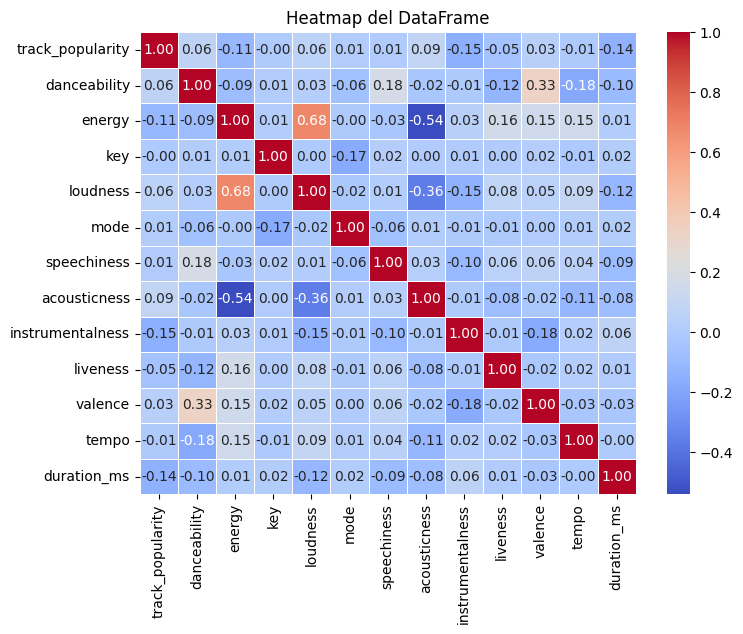

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Heatmap del DataFrame')
plt.show()

In [6]:
columnas_a_borrar = ['key', 'mode', 'tempo', "duration_ms"]
df = df.drop(columnas_a_borrar, axis=1)
df.head()

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,66,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518
1,67,0.726,0.815,-4.969,0.0373,0.0724,0.004210,0.3570,0.693
2,70,0.675,0.931,-3.432,0.0742,0.0794,0.000023,0.1100,0.613
3,60,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277
4,69,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725


In [7]:
df = df.drop('loudness', axis=1)
df.head()

,track_popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,66,0.748,0.916,0.0583,0.1020,0.000000,0.0653,0.518
1,67,0.726,0.815,0.0373,0.0724,0.004210,0.3570,0.693
2,70,0.675,0.931,0.0742,0.0794,0.000023,0.1100,0.613
3,60,0.718,0.930,0.1020,0.0287,0.000009,0.2040,0.277
4,69,0.650,0.833,0.0359,0.0803,0.000000,0.0833,0.725


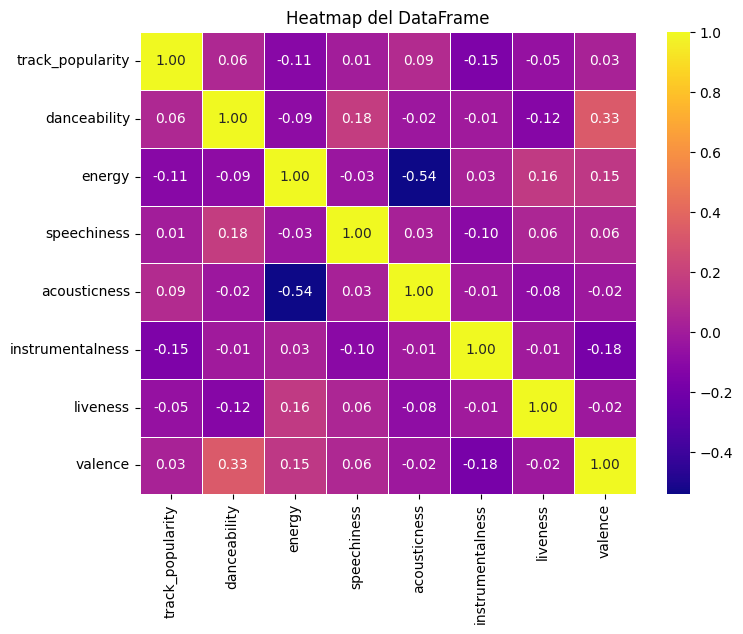

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma', linewidths=.5, fmt=".2f")
plt.title('Heatmap del DataFrame')
plt.show()

In [5]:

standard_pich_class = {
    0: 'C', 1: 'C#', 2: 'D', 3: 'D#',
    4: 'E', 5: 'F', 6: 'F#', 7: 'G',
    8: 'G#', 9: 'A', 10: 'A#', 11: 'B'
}

df['key'] = df['key'].map(standard_pich_class)
df['mode'] = df['mode'].apply(lambda x: 'Major' if x == 1 else 'Minor')

unique_values = df['key'].unique()
modo_uni = df['mode'].unique()
# Imprimir los valores únicos
print(unique_values)
print(modo_uni)

['F#' 'B' 'C#' 'G' 'G#' 'F' 'E' 'D' 'C' 'A#' 'A' 'D#']
['Major' 'Minor']


In [6]:
df.to_csv('base.csv', index=False)

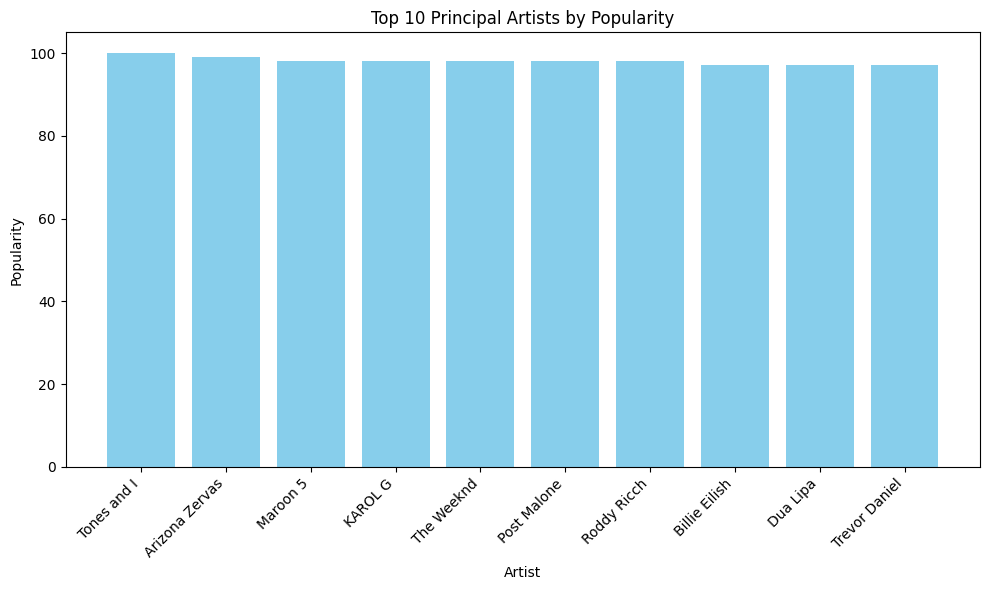

In [6]:
# Ordena el DataFrame por la columna 'popularity' de manera descendente
df_ordenado = df.sort_values(by='track_popularity', ascending=False)

# Selecciona los primeros 10 registros para la visualización
df_top_10_popularity = df_ordenado.head(10)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_popularity['track_artist'], df_top_10_popularity['track_popularity'], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Principal Artists by Popularity')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar las etiquetas
plt.show()

In [13]:
df_top_10_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 20091 to 20252
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  10 non-null     object 
 1   track_name                10 non-null     object 
 2   track_artist              10 non-null     object 
 3   track_popularity          10 non-null     int64  
 4   track_album_id            10 non-null     object 
 5   track_album_name          10 non-null     object 
 6   track_album_release_date  10 non-null     object 
 7   playlist_name             10 non-null     object 
 8   playlist_id               10 non-null     object 
 9   playlist_genre            10 non-null     object 
 10  playlist_subgenre         10 non-null     object 
 11  danceability              10 non-null     float64
 12  energy                    10 non-null     float64
 13  key                       10 non-null     int64  
 14  loudness  

In [8]:
unique_counts = df.nunique()
print(unique_counts)

track_id                    28356
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22545
track_album_name            19743
track_album_release_date     4530
playlist_name                 448
playlist_id                   470
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17684
duration_ms                 19785
dtype: int64


In [9]:
deletecol = ["track_id", "track_album_id", ]
df = df.drop(columns=deletecol, errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28356 entries, 0 to 32832
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                28352 non-null  object 
 1   track_artist              28352 non-null  object 
 2   track_popularity          28356 non-null  int64  
 3   track_album_name          28352 non-null  object 
 4   track_album_release_date  28356 non-null  object 
 5   playlist_name             28356 non-null  object 
 6   playlist_id               28356 non-null  object 
 7   playlist_genre            28356 non-null  object 
 8   playlist_subgenre         28356 non-null  object 
 9   danceability              28356 non-null  float64
 10  energy                    28356 non-null  float64
 11  key                       28356 non-null  int64  
 12  loudness                  28356 non-null  float64
 13  mode                      28356 non-null  int64  
 14  speechiness

: 